In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect = True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [9]:
#Inspect the database 
inspector = inspect(engine)

In [10]:
# List all the columns for Measurement Class 
columns = inspector.get_columns('measurement')
for column in columns:
    print(column['name'], column['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [11]:
# List all the columns for station Class 
columns = inspector.get_columns('station')
for column in columns:
    print(column['name'], column['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Precipitation Analysis

In [12]:
# Find the most recent date in the data set.
recent_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
print (recent_date[0])

2017-08-23


In [13]:
converted_recent_date =  (recent_date[0], '%Y-%m-%d')
converted_recent_date

('2017-08-23', '%Y-%m-%d')

In [19]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
converted_recent_date = dt.datetime.strptime(recent_date[0], '%Y-%m-%d')
# Calculate the date one year from the last date in data set.
query_date = dt.date(converted_recent_date.year -1, converted_recent_date.month, converted_recent_date.day)
query_date

# Perform a query to retrieve the data and precipitation scores
sel = [measurement.date,measurement.prcp]
result = session.query(*sel).filter(measurement.date >= query_date).all()
# Save the query results as a Pandas DataFrame and set the index to the date column
precipitation = pd.DataFrame(result, columns=['Date','Precipitation'])
precipitation = precipitation.dropna()

# Sort the dataframe by date
precipitation = precipitation.sort_values(["Date"], ascending=True)
precipitation = precipitation.set_index("Date")
precipitation





,Precipitation
Date,
2016-08-23,0.00
2016-08-23,0.02
2016-08-23,0.05
2016-08-23,0.70
2016-08-23,0.15
...,...
2017-08-22,0.50
2017-08-23,0.00
2017-08-23,0.08


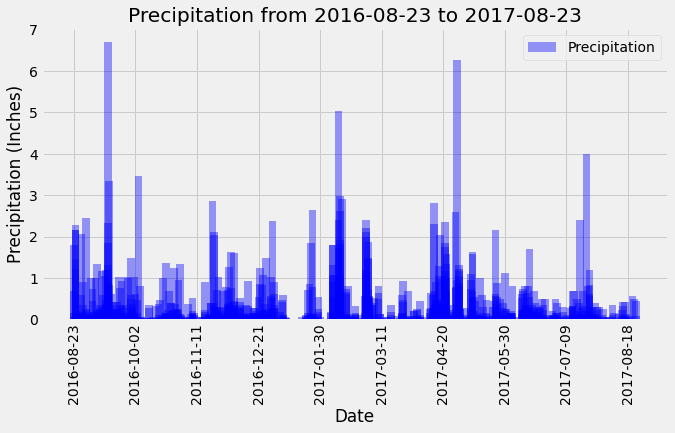

In [21]:
# Use Pandas Plotting with Matplotlib to plot the data
x_axis = precipitation.index.tolist()
y_axis = precipitation['Precipitation'].tolist()
plt.figure(figsize=(10,5))
plt.bar(x_axis,y_axis,width = 5 ,color= "blue", alpha= 0.4, align="center",label='Precipitation')
major_ticks = np.arange(0,400,40)
plt.xticks(major_ticks, rotation = 90)
plt.title(f"Precipitation from {query_date} to {recent_date[0]}")
plt.xlabel("Date")
plt.ylabel("Precipitation (Inches)")
plt.grid(which='major', axis='both', linestyle='-')
plt.legend()
plt.show()

In [22]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipitation.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [23]:
# Design a query to calculate the total number stations in the dataset
total_number_stations= session.query(station).count()
print(total_number_stations)

9


In [24]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
sel = [measurement.station,func.count(measurement.id)]
active_stations = session.query(*sel).group_by(measurement.station).order_by(func.count(measurement.id).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [25]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
sel =[measurement.station, func.min(measurement.tobs),func.max(measurement.tobs),func.avg(measurement.tobs)]
most_active_station = session.query(*sel).group_by(measurement.station).order_by(func.count(measurement.id).desc()).first()
most_active_station

('USC00519281', 54.0, 85.0, 71.66378066378067)

In [26]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

temperatures = session.query(measurement.tobs).filter(measurement.station == most_active_station[0]).\
    filter(measurement.date >= query_date).all()
temperatures

[(77.0,),
 (77.0,),
 (80.0,),
 (80.0,),
 (75.0,),
 (73.0,),
 (78.0,),
 (77.0,),
 (78.0,),
 (80.0,),
 (80.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (73.0,),
 (74.0,),
 (80.0,),
 (79.0,),
 (77.0,),
 (80.0,),
 (76.0,),
 (79.0,),
 (75.0,),
 (79.0,),
 (78.0,),
 (79.0,),
 (78.0,),
 (78.0,),
 (76.0,),
 (74.0,),
 (77.0,),
 (78.0,),
 (79.0,),
 (79.0,),
 (77.0,),
 (80.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (77.0,),
 (79.0,),
 (79.0,),
 (79.0,),
 (79.0,),
 (75.0,),
 (76.0,),
 (73.0,),
 (72.0,),
 (71.0,),
 (77.0,),
 (79.0,),
 (78.0,),
 (79.0,),
 (77.0,),
 (79.0,),
 (77.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (77.0,),
 (74.0,),
 (75.0,),
 (76.0,),
 (73.0,),
 (76.0,),
 (74.0,),
 (77.0,),
 (76.0,),
 (76.0,),
 (74.0,),
 (75.0,),
 (75.0,),
 (75.0,),
 (75.0,),
 (71.0,),
 (63.0,),
 (70.0,),
 (68.0,),
 (67.0,),
 (77.0,),
 (74.0,),
 (77.0,),
 (76.0,),
 (76.0,),
 (75.0,),
 (76.0,),
 (75.0,),
 (73.0,),
 (75.0,),
 (73.0,),
 (75.0,),
 (74.0,),
 (75.0,),
 (74.0,),
 (75.0,),
 (73.0,),
 (75.0,),
 (73.0,),
 (73.0,),


In [27]:
temp_df = pd.DataFrame(temperatures, columns=["tobs"])
temp_df.head()

,tobs
0,77.0
1,77.0
2,80.0
3,80.0
4,75.0


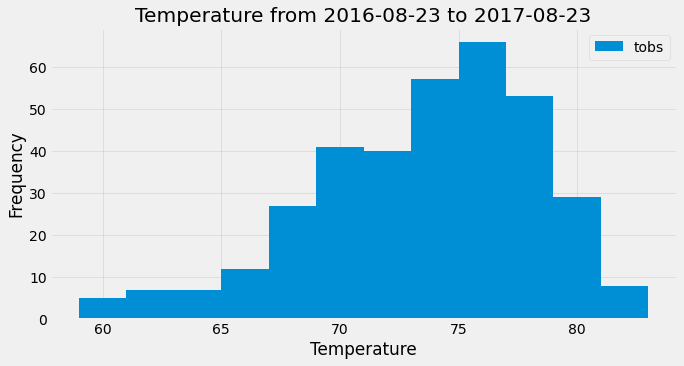

In [28]:
# Use Pandas Plotting with Matplotlib to plot the data
plt.figure(figsize=(10,5))
plt.hist(temp_df, bins=12,label='tobs')
plt.grid(axis='both', alpha=0.5)
plt.ylabel('Frequency')
plt.xlabel('Temperature')
plt.title(f"Temperature from {query_date} to {recent_date[0]}")
plt.legend()

# Close session

In [29]:
# Close Session
session.close()